## [전통적인 선형회귀분석 원리]  작성자:부성순

## [Part1] 모집단과 표본집단의 분산 표준편차 계산
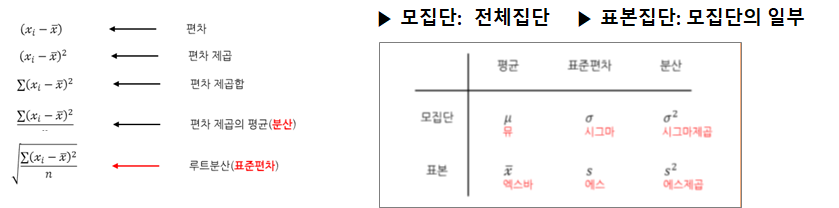

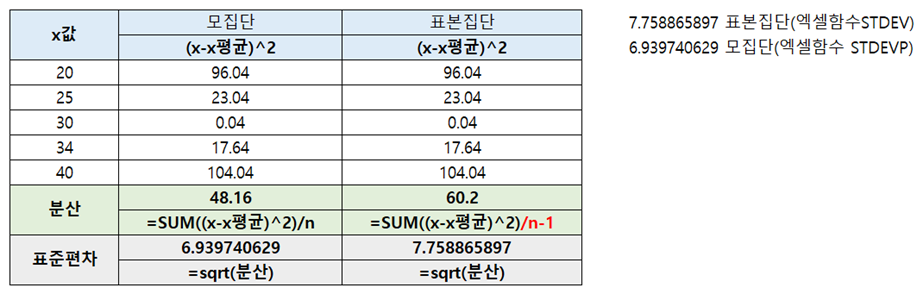

https://numpy.org/doc/stable/reference/generated/numpy.std.html
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.std.html

In [2]:
import numpy as np
x=[20,25,30,34,40]

print('---넘파이 모집단 분산/편차-----')
print('▶모집단 분산:',np.var(x))  # 모집단 분산, 기본 ddof=0임, ddof=1로 하면 표본집단
print('▶표본집단 분산:',np.var(x,ddof=1))  # 모집단 분산, 기본 ddof=0임, ddof=1로 하면 표본집단
print('▶모집단 표준편차:',np.std(x)) # 모집단 표준편차
print("▶표본집단 표준편차:",np.std(x,ddof=1))  # 표본집단 표준편차


---넘파이 모집단 분산/편차-----
▶모집단 분산: 48.160000000000004
▶표본집단 분산: 60.2
▶모집단 표준편차: 6.939740629158989
▶표본집단 표준편차: 7.758865896508329


In [3]:
import pandas as pd

df=pd.DataFrame({"x":x})    

# 기본 ddof=1임, ddof=0으로 하면 모집단
print('▶표본집단 분산:',df.var()) # 판다스 표본집단 분산, 
print('▶표본집단 표준편차:',df.std())  # 판다스 표본집단 표준편차
print('▶모집단 표준편차:',df.std(ddof=0))
print('▶판다스를 values로하면 모집단이 기본(표준편차):',df['x'].values.std())

▶표본집단 분산: x    60.2
dtype: float64
▶표본집단 표준편차: x    7.758866
dtype: float64
▶모집단 표준편차: x    6.939741
dtype: float64
▶판다스를 values로하면 모집단이 기본(표준편차): 6.939740629158989


In [4]:
type(df['x']), '/', type(df['x'].values)

(pandas.core.series.Series, '/', numpy.ndarray)

## [Part2] 상관계수 R 값 계산
 상관관계의 정도를 파악하는 상관 계수(相關係數, Correlation coefficient)
 
https://sikaleo.tistory.com/42
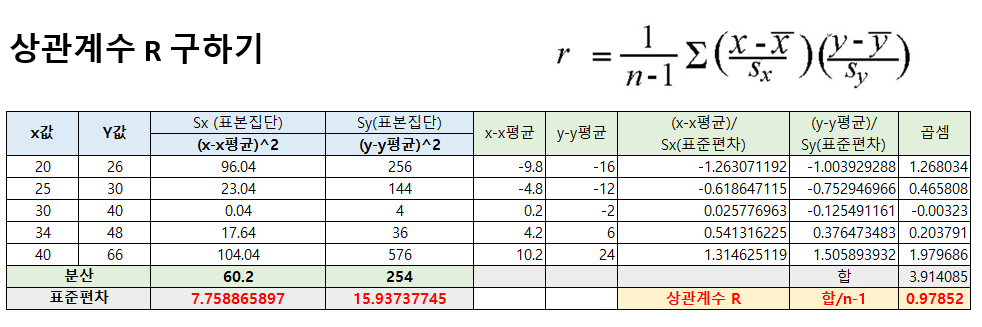

In [5]:
import numpy as np
x=[20,25,30,34,40]
y=[26,30,40,48,66]
df=pd.DataFrame({'x':x,'y':y})

print(df)
df.corr()
print(df.corr(method='pearson'))   # method 생략하면 기본 pearson

df['x'].corr(df['y'])

    x   y
0  20  26
1  25  30
2  30  40
3  34  48
4  40  66
          x         y
x  1.000000  0.978521
y  0.978521  1.000000


0.9785212611534365

## [Part3] 기울기를 구합니다.
방법1) 상관계수를 구하고 기울기를 구한다.
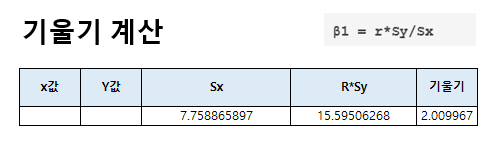


방법2) 기울기를 구하고 상관계수를 구한다.
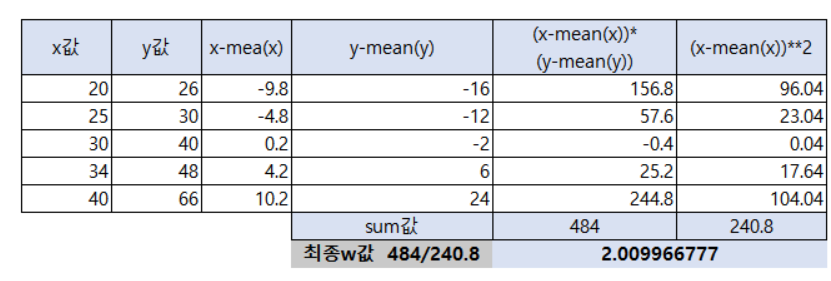

In [6]:
# 방법2를 이용한 기울기작성
w=sum((df['x']-df['x'].mean()) * (df['y']-df['y'].mean())) / sum((df['x']-df['x'].mean())**2)
w


2.009966777408638

## [Part4] 절편값을 구합니다.
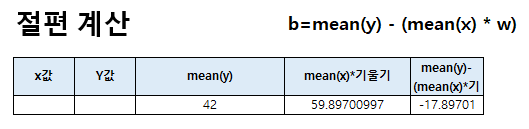

In [7]:
 # 절편값 계산 b
b=df['y'].mean() - (df['x'].mean()*w)
b

-17.89700996677741

## [Part5] 선형회귀 공식을 작성하여 차트를 작성하여 봅니다.
###  lr=wx+b

In [8]:
# 선형회귀 공식 적용
df['lr']=w*df['x']+b
df

,x,y,lr
0,20,26,22.302326
1,25,30,32.352159
2,30,40,42.401993
3,34,48,50.441860
4,40,66,62.501661


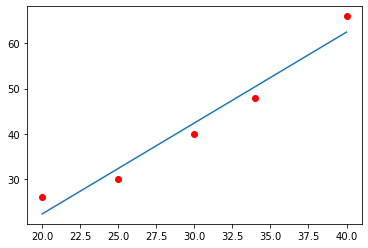

In [9]:
import warnings
warnings.filterwarnings(action='ignore')
        
import matplotlib.pyplot as plt
plt.plot(df['x'],df['y'],'ro')
plt.plot(df['x'],df['lr'])  # wx+b

In [10]:
def prediction(newX):
    print(w*newX+b)

In [11]:
prediction(20)

22.302325581395344


## [Part6] 사이킷런의 선형회귀식 적용

In [13]:

#!pip install sklearn  # pip 인스톨  conda install scikit-learn?
!pip install scikit-learn

In [14]:
#%matplotlib inline
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [15]:

model.fit(df['x'].values.reshape(-1,1),df['y'].values.reshape(-1,1))
model.predict([[20]])




array([[22.30232558]])

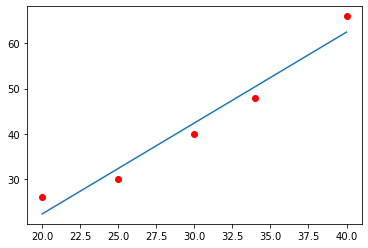

In [16]:

y_hat=model.predict(df['x'].values.reshape(-1,1))
y_hat.reshape(-1)

plt.plot(df['x'],df['y'],'ro')
plt.plot(df['x'],y_hat.reshape(-1))  # wx+b



## [Part7] 모델 성능평가요소
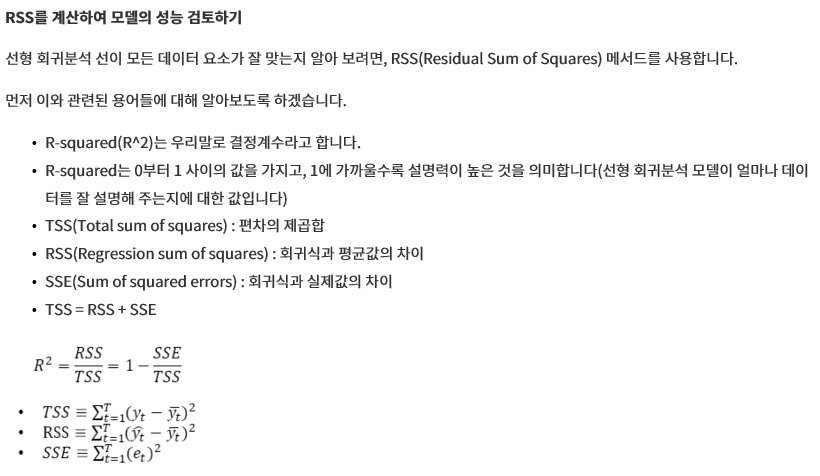
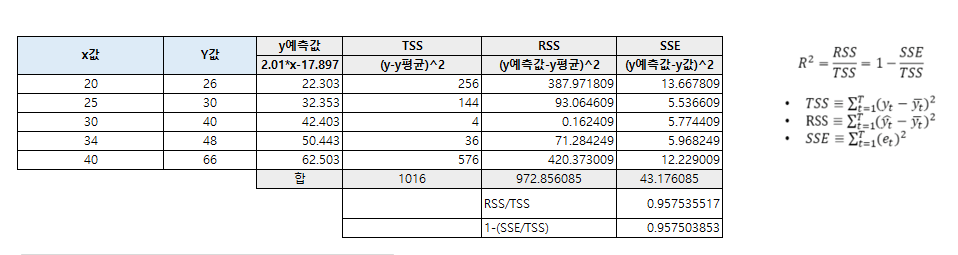

In [17]:

x=df['x'].values.reshape(-1,1)
y=df['y'].values.reshape(-1,1)


TSS=np.sum((y-np.mean(y))**2)
print('▶TSS:%.2f' % TSS)

RSS=np.sum((y_hat-np.mean(y))**2)
print('▶RSS:%.2f' % RSS)   

SSE=np.sum((y-model.predict(x))**2)
print('▶SSE:%.2f' % SSE)   # rss값은 sse값으로도 표현됨



print('▶R2= 1-SSE/TSS: %.2f'% (1-SSE/TSS ))



▶TSS:1016.00
▶RSS:972.82
▶SSE:43.18
▶R2= 1-SSE/TSS: 0.96


In [152]:
from sklearn.metrics import r2_score
y_hat=x*model.coef_+model.intercept_
print(y_hat)
r2_score(y,y_hat)  # 사이킷런 제공 R2값


[[22.30232558]
 [32.35215947]
 [42.40199336]
 [50.44186047]
 [62.50166113]]


0.9575038585293117

# [Part8] OLS 선형회귀

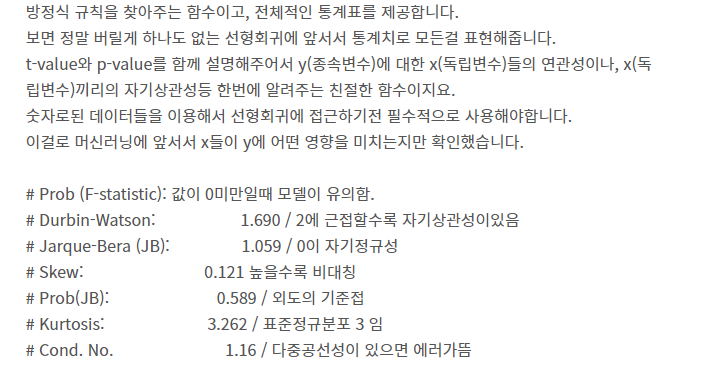

In [160]:
!pip install statsmodels

In [170]:
# https://datacook.tistory.com/39

import statsmodels.api as sm
lr = sm.OLS(y,x)
result= lr.fit() 
print(result.summary())
result.params


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                              309.3
Date:                Wed, 08 Sep 2021   Prob (F-statistic):                    6.14e-05
Time:                        16:56:45   Log-Likelihood:                         -15.153
No. Observations:                   5   AIC:                                      32.31
Df Residuals:                       4   BIC:                                      31.92
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\user4\.conda\envs\hmh\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


array([1.44029054])

# [Part9] 모델 저장 및 재 활용

In [172]:
# https://cyan91.tistory.com/39

import pickle

In [175]:
filename='StartLr.sav'
pickle.dump(model,open(filename,'wb'))

In [187]:
# 회귀식 로드
import pickle
x=[[20],[25],[30],[34],[40]]
y=[[26],[30],[40],[48],[66]]

#

load_model=pickle.load(open('StartLr.sav','rb'))
print(load_model.score(x,y))

print(load_model.predict([[20]]))

0.9575038585293117
[[22.30232558]]
